<a href="https://colab.research.google.com/github/FancyFun/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [194]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [195]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',parse_dates=['created'])
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [196]:
df.head(2)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
start_date = '2016-04-01'
end_date = '2016-05-30'
june_date1 = '2016-06-01'
june_date2 = '2016-06-30'

#split the dates from the data frame

mask = (df['created'] > start_date) & (df['created'] <= end_date)
mask2 = (df['created'] > june_date1) & (df['created'] <= june_date2)

y = df['price']

X = df[['bedrooms','bathrooms']]

Xtrain2, ytrain2 = X.loc[mask], y.loc[mask]
Xval2, yval2 = X.loc[mask2], y.loc[mask2]

In [198]:
Xtrain2.shape

(31626, 2)

In [199]:
Xval2.shape

(16973, 2)

In [200]:
df.shape

(48817, 34)

###linear Regression

In [201]:
#I must create a linear regression model with two features
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
sos = lr.predict(X)

m, b = np.polyfit(X['bathrooms'],y,1)





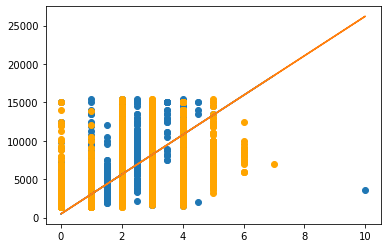

In [202]:
import matplotlib.pyplot as plt

plt.scatter(Xtrain2['bathrooms'],ytrain2)
plt.scatter(Xtrain2['bedrooms'], ytrain2, color='orange')
plt.plot(Xtrain2, m*Xtrain2 + b)


plt.show()


In [203]:
#coefficient
m

2573.3619830951266

In [204]:
#intercept
b

486.9330801928676

###RMSE, MAE, and  R2

In [215]:
#Xtrain2 Xval2
from sklearn.metrics import mean_squared_error, mean_absolute_error
RMSE = mean_squared_error(ytrain2, [ytrain2.mean()]*len(ytrain2), squared=False)
RMSE

1763.5319512271608

In [217]:
MAE = mean_absolute_error(ytrain2, [ytrain2.mean()]*len(ytrain2))
MAE

1202.912286394699

In [221]:
#R^2 Bathroom version
matrix = np.corrcoef(Xtrain2['bathrooms'],ytrain2)
correlation = matrix[0,1]
togo = correlation**2
togo

0.46859642589530565

In [223]:
#Bedrooms version
matrix2 = np.corrcoef(Xtrain2['bedrooms'],ytrain2)
correlation2 = matrix2[0,1]
togo2 = correlation2**2
togo2

0.2879876676752903

###Part 2 Xval2 version

In [224]:
RMSE2 = mean_squared_error(yval2, [yval2.mean()]*len(yval2), squared=False)
RMSE2

1762.9581015590138

In [225]:
MAE = mean_absolute_error(yval2, [yval2.mean()]*len(yval2))
MAE

1200.8695333832386

In [226]:
#bathrooms version
matrix3 = np.corrcoef(Xval2['bathrooms'],yval2)
correlation3 = matrix3[0,1]
togo3 = correlation3**2
print(togo3)

0.4808058849730774


In [227]:
#bedrooms version
matrix4 = np.corrcoef(Xval2['bedrooms'],yval2)
correlation4 = matrix3[0,1]
togo4 = correlation4**2
print(togo4)

0.4808058849730774
